In [1]:
import pandas as pd
import numpy as np

In [2]:
writePath = './Data/NewData.csv'
writePath2 = './Data/NewData_Temp.csv'

In [3]:
def ShowDataInfo(Data):
    print('--------------------')
    print(Data.head(5))
    print('--------------------')
    print('Total len：', len(Data))
    print('Null-Sum：')
    DataNull = Data.isnull().sum()
    print(DataNull[DataNull>0])

    print('--------------------')
    print('unique number of each column')
    for Col in Data.columns:
        print(Col, '：', len(Data[Col].unique()))

from sklearn.preprocessing import LabelEncoder
def ConvertTypeToNumber(Data):
#     print('Class：', Data.unique())
    orgLabel = list(Data.unique())
    classLE = LabelEncoder()
    Data = classLE.fit_transform(Data.values)
    NewLabel = list(pd.DataFrame(Data)[0].unique())
    mappingLabel = [orgLabel, NewLabel]
    return Data, mappingLabel

def twoListSort(list1, list2):
    zipped_lists = zip(list1, list2)
    sorted_pairs = sorted(zipped_lists)
    tuples = zip(*sorted_pairs)
    list1, list2 = [ list(tuple) for tuple in  tuples]
    return list1, list2

def cutDef(Data, Type, qcutNum, cut='qcut'):
    if(cut == 'cut'):
        Data[Type] = pd.cut(Data[Type], qcutNum)
    else:
        Data[Type] = pd.qcut(Data[Type], qcutNum)
    Data[Type], TempLabel = ConvertTypeToNumber(Data[Type])
    TempLabel = twoListSort(TempLabel[1], TempLabel[0])
    print(Type, ' ： ', TempLabel)
    print(Type, ' - counts：')
    print(Data[Type].value_counts(normalize=True))
    print('')
    return Data

import matplotlib.pyplot as plt
def plotHistogram(Data, title, xLabel, yLabel):
    fig, ax = plt.subplots(figsize = (4, 3))
    DataCounts = Data.value_counts(normalize=False)
    x = DataCounts.index
    y = DataCounts
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    plt.show()

# Data1 - PatientInfo

----------------------------------------
age
[1 0 2]
1    0.474945
0    0.302506
2    0.222550
Name: age, dtype: float64


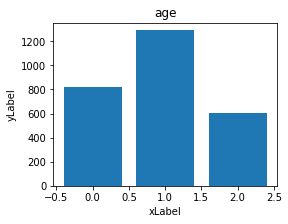

infection_case
['overseas inflow' 'contact with patient' 'etc' 'hospital' 'religion']
contact with patient    0.381356
etc                     0.311349
overseas inflow         0.219602
religion                0.057111
hospital                0.030582
Name: infection_case, dtype: float64


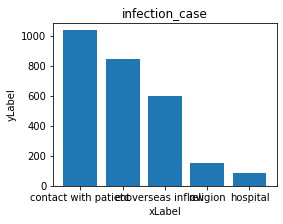

----------------------------------------
----------------------------------------
DateTime
----------------------------------------
----------------------------------------
qcut
confirmed_date  ：  ([0, 1, 2], [Interval(1579478399.999, 1583452800.0, closed='right'), Interval(1583452800.0, 1585267200.0, closed='right'), Interval(1585267200.0, 1590796800.0, closed='right')])
confirmed_date  - counts：
0    0.338615
1    0.335667
2    0.325718
Name: confirmed_date, dtype: float64

----------------------------------------
----------------------------------------
rename
--------------------
   patient_id Pat_sex Pat_age province         city          Pat_inf_case  \
0  1000000001    male       1    Seoul   Gangseo-gu       overseas inflow   
1  1000000002    male       1    Seoul  Jungnang-gu       overseas inflow   
2  1000000003    male       1    Seoul    Jongno-gu  contact with patient   
3  1000000004    male       0    Seoul      Mapo-gu       overseas inflow   
4  1000000005  female   

In [4]:
readPath1 = './Data/PatientInfo.csv'
Data1 = pd.read_csv(readPath1)
Data1 = Data1.drop(columns=['global_num', 'disease', 'infection_order', 'infected_by', 
                    'contact_number', 'symptom_onset_date', 'released_date', 'deceased_date', 'birth_year', 'country'])
Data1 = Data1.dropna()

print('----------------------------------------')
Data1.loc[(Data1['age'] == '0s') |
         (Data1['age'] == '10s') |
         (Data1['age'] == '20s'), 'age'] = 0

#1
Data1.loc[(Data1['age'] == '50s') |
         (Data1['age'] == '40s') |
         (Data1['age'] == '30s') |
         (Data1['age'] == '30'), 'age'] = 1

#1
Data1.loc[(Data1['age'] == '60s') |
         (Data1['age'] == '70s') |
         (Data1['age'] == '80s') |
         (Data1['age'] == '90s') |
         (Data1['age'] == '100s'), 'age'] = 2

print('age')
print(Data1['age'].unique())
print(Data1['age'].value_counts(normalize=True))
plotHistogram(Data1['age'], 'age', 'xLabel', 'yLabel')

#religion
Data1.loc[(Data1['infection_case'] == 'Shincheonji Church') |
         (Data1['infection_case'] == 'Onchun Church') |
         (Data1['infection_case'] == 'Dongan Church') |
         (Data1['infection_case'] == 'Geochang Church') |
         (Data1['infection_case'] == 'Suyeong-gu Kindergarten') |
         (Data1['infection_case'] == 'River of Grace Community Church'), 'infection_case'] = 'religion'

#hospital
Data1.loc[(Data1['infection_case'] == 'Cheongdo Daenam Hospital') |
         (Data1['infection_case'] == "Eunpyeong St. Mary's Hospital") |
         (Data1['infection_case'] == 'Bonghwa Pureun Nursing Home') |
         (Data1['infection_case'] == 'Gyeongsan Seorin Nursing Home') |
         (Data1['infection_case'] == ''), 'infection_case'] = 'hospital'

#etc
Data1.loc[(Data1['infection_case'] != 'contact with patient') &
         (Data1['infection_case'] != "overseas inflow") &
         (Data1['infection_case'] != 'religion') &
         (Data1['infection_case'] != 'hospital'), 'infection_case'] = 'etc'

print('infection_case')
print(Data1['infection_case'].unique())
print(Data1['infection_case'].value_counts(normalize=True))
plotHistogram(Data1['infection_case'], 'infection_case', 'xLabel', 'yLabel')
print('----------------------------------------')

print('----------------------------------------')
print('DateTime')
#(1579478400 - 1583452800) (1583452800 - 1585267200) (1585267200 - 1590796800)
#(2020-01-20 - 2020-03-06) (2020-03-06 - 2020-03-27) (2020-03-27 - 2020-05-30)
Data1['confirmed_date'] = pd.to_datetime(Data1['confirmed_date']).values.astype(np.int64) // 10 ** 9
print('----------------------------------------')

print('----------------------------------------')
print('qcut')
Data1 = cutDef(Data1, 'confirmed_date', 3)
print('----------------------------------------')

print('----------------------------------------')
print('rename')
Data1 = Data1.rename(columns={'sex': 'Pat_sex', 
                              'age': 'Pat_age', 
                              'infection_case': 'Pat_inf_case', 
                              'confirmed_date': 'Pat_con_date', 
                              'state': 'Pat_state'})
ShowDataInfo(Data1)
print('----------------------------------------')

# Data2 - Case (No use.)

# Data3 - PatientRoute

----------------------------------------
type
['transportation' 'hospital' 'etc' 'shop' 'restaurant' 'entertainment'
 'government' 'school']
etc               0.299061
hospital          0.297825
shop              0.127286
transportation    0.117029
restaurant        0.109244
entertainment     0.027682
school            0.013717
government        0.008156
Name: type, dtype: float64


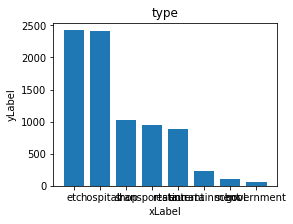

province
['Gyeonggi-do' 'Seoul' 'Others' 'Gyeongsangbuk-do']
Seoul               0.454152
Others              0.399160
Gyeongsangbuk-do    0.106154
Gyeonggi-do         0.040534
Name: province, dtype: float64


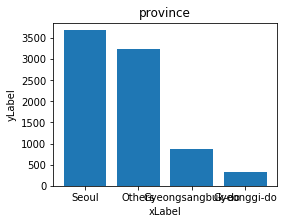

----------------------------------------
----------------------------------------
rename
--------------------
   patient_id  Rou_type_entertainment  Rou_type_etc  Rou_type_government  \
0  1000000001                       0             0                    0   
1  1000000002                       0             1                    0   
2  1000000003                       1             0                    0   
3  1000000004                       0             0                    0   
4  1000000005                       0             0                    0   

   Rou_type_hospital  Rou_type_restaurant  Rou_type_school  Rou_type_shop  \
0                  1                    0                0              0   
1                  1                    1                0              1   
2                  0                    1                0              0   
3                  1                    0                0              0   
4                  1                    0       

In [5]:
readPath3 = './Data/PatientRoute.csv'
Data3 = pd.read_csv(readPath3)
Data3 = Data3.drop(columns=['global_num', 'latitude', 'longitude', 'date', 'city'])# , 'province', 'city'
Data3 = Data3.dropna()

print('----------------------------------------')
#School
Data3.loc[(Data3['type'] == 'school') |
         (Data3['type'] == 'academy') |
         (Data3['type'] == 'university'), 'type'] = 'school'

#Restaurant
Data3.loc[(Data3['type'] == 'restaurant') |
         (Data3['type'] == 'cafe') |
         (Data3['type'] == 'pc_cafe') |
         (Data3['type'] == 'bar'), 'type'] = 'restaurant'

#Shop
Data3.loc[(Data3['type'] == 'store') |
         (Data3['type'] == 'pharmacy') |
         (Data3['type'] == 'bakery'), 'type'] = 'shop'

#Transportation
Data3.loc[(Data3['type'] == 'public_transportation') |
         (Data3['type'] == 'airport'), 'type'] = 'transportation'

#Government
Data3.loc[(Data3['type'] == 'administrative_area_level_1') |
         (Data3['type'] == 'post_office') |
         (Data3['type'] == 'bank'), 'type'] = 'government'

#Entertainment
Data3.loc[(Data3['type'] == 'gym') |
         (Data3['type'] == 'beauty_salon') |
         (Data3['type'] == 'karaoke') |
         (Data3['type'] == 'park') |
         (Data3['type'] == 'church'), 'type'] = 'entertainment'

#etc
Data3.loc[(Data3['type'] == 'etc') |
         (Data3['type'] == 'gas_station') |
         (Data3['type'] == 'real_estate_agency') |
         (Data3['type'] == 'lodging'), 'type'] = 'etc'

print('type')
print(Data3['type'].unique())
print(Data3['type'].value_counts(normalize=True))
plotHistogram(Data3['type'], 'type', 'xLabel', 'yLabel')

# province Gyeonggi-do 0.31, Seoul 0.21, Gyeongsangbuk-do, 0.19, Chungcheongnam-do 0.05, Busan 0.05
Data3.loc[(Data3['province'] != 'Gyeonggi-do') &
         (Data3['province'] != 'Seoul') &
         (Data3['province'] != 'Gyeongsangbuk-do'), 'province'] = 'Others'

print('province')
print(Data3['province'].unique())
print(Data3['province'].value_counts(normalize=True))
plotHistogram(Data3['province'], 'province', 'xLabel', 'yLabel')
print('----------------------------------------')

print('----------------------------------------')
print('rename')
Data3 = Data3.rename(columns={'province': 'Rou_prov', 'type': 'Rou_type'})
Data3 = pd.get_dummies(Data3, columns=['Rou_type', 'Rou_prov'])
Data3 = Data3.groupby(['patient_id']).max().reset_index()
ShowDataInfo(Data3)
print('----------------------------------------')


# Data4 - Region

In [6]:
readPath4 = './Data/Region.csv'
Data4 = pd.read_csv(readPath4)
Data4 = Data4.drop(columns=['code', 'latitude', 'longitude', 'academy_ratio'])
Data4 = Data4.dropna()

print('----------------------------------------')
print('qcut and cut')
Data4 = cutDef(Data4, 'elementary_school_count', 3, 'qcut')
Data4 = cutDef(Data4, 'kindergarten_count', 3, 'qcut')
Data4 = cutDef(Data4, 'university_count', 2, 'qcut')
Data4 = cutDef(Data4, 'elderly_population_ratio', 3, 'cut')
Data4 = cutDef(Data4, 'elderly_alone_ratio', 3, 'cut')
Data4 = cutDef(Data4, 'nursing_home_count', 3, 'qcut')
print('----------------------------------------')

print('----------------------------------------')
print('rename')
Data4 = Data4.rename(columns={'elementary_school_count': 'Reg_ele_count', 
                              'kindergarten_count': 'Reg_kin_count', 
                              'university_count': 'Reg_uni_count', 
                              'elderly_population_ratio': 'Reg_pop_ratio', 
                              'elderly_alone_ratio': 'Reg_alo_ratio', 
                              'nursing_home_count': 'Reg_hom_count'})
ShowDataInfo(Data4)
print('----------------------------------------')

----------------------------------------
qcut and cut
elementary_school_count  ：  ([0, 1, 2], [Interval(3.999, 17.0, closed='right'), Interval(17.0, 30.0, closed='right'), Interval(30.0, 6087.0, closed='right')])
elementary_school_count  - counts：
0    0.356557
2    0.327869
1    0.315574
Name: elementary_school_count, dtype: float64

kindergarten_count  ：  ([0, 1, 2], [Interval(3.999, 19.0, closed='right'), Interval(19.0, 43.0, closed='right'), Interval(43.0, 8837.0, closed='right')])
kindergarten_count  - counts：
1    0.336066
0    0.336066
2    0.327869
Name: kindergarten_count, dtype: float64

university_count  ：  ([0, 1], [Interval(-0.001, 1.0, closed='right'), Interval(1.0, 340.0, closed='right')])
university_count  - counts：
0    0.581967
1    0.418033
Name: university_count, dtype: float64

elderly_population_ratio  ：  ([0, 1, 2], [Interval(7.657, 18.547, closed='right'), Interval(18.547, 29.403, closed='right'), Interval(29.403, 40.26, closed='right')])
elderly_population_rati

In [7]:
print('----------------------------------------')
print('Merge')
# Data2 no-help
Data1 = Data1.dropna()
Data3 = Data3.dropna()
Data4 = Data4.dropna()
Data = pd.merge(Data1, Data4, on=['city', 'province'], how='inner')
Data = pd.merge(Data, Data3, on=['patient_id'], how='left')
Data = Data.fillna(0)
Data = Data.sort_values(by=['patient_id'])
# province Gyeonggi-do 0.31, Seoul 0.21, Gyeongsangbuk-do, 0.19, Chungcheongnam-do 0.05, Busan 0.05
Data.loc[(Data['province'] != 'Gyeonggi-do') &
         (Data['province'] != 'Seoul') &
         (Data['province'] != 'Gyeongsangbuk-do'), 'province'] = 'Others'

Data['province'], TempLabel = ConvertTypeToNumber(Data['province'])
print('province Label：', TempLabel)
print('')
Data = Data.drop(columns=['city', 'patient_id'])
print('----------------------------------------')

print('----------------------------------------')
print('rename')
Data = Data.rename(columns={'province': 'Pat_prov'})
Data.to_csv(writePath2, index = False)
Data = pd.get_dummies(Data, columns=['Pat_sex', 'Pat_age', 'Pat_inf_case', 
                                      'Pat_con_date', 'Pat_state'])
Data = pd.get_dummies(Data, columns=['Reg_ele_count', 'Reg_kin_count', 'Reg_uni_count', 
                                      'Reg_pop_ratio', 'Reg_alo_ratio', 'Reg_hom_count'])
Data = pd.get_dummies(Data, columns=['Pat_prov'])
print('Data columns：', Data.columns)
ShowDataInfo(Data)
Data.to_csv(writePath, index = False)
print('----------------------------------------')

----------------------------------------
Merge
province Label： [['Seoul', 'Others', 'Gyeonggi-do', 'Gyeongsangbuk-do'], [3, 2, 0, 1]]

----------------------------------------
----------------------------------------
rename
Data columns： Index(['Rou_type_entertainment', 'Rou_type_etc', 'Rou_type_government',
       'Rou_type_hospital', 'Rou_type_restaurant', 'Rou_type_school',
       'Rou_type_shop', 'Rou_type_transportation', 'Rou_prov_Gyeonggi-do',
       'Rou_prov_Gyeongsangbuk-do', 'Rou_prov_Others', 'Rou_prov_Seoul',
       'Pat_sex_female', 'Pat_sex_male', 'Pat_age_0', 'Pat_age_1', 'Pat_age_2',
       'Pat_inf_case_contact with patient', 'Pat_inf_case_etc',
       'Pat_inf_case_hospital', 'Pat_inf_case_overseas inflow',
       'Pat_inf_case_religion', 'Pat_con_date_0', 'Pat_con_date_1',
       'Pat_con_date_2', 'Pat_state_deceased', 'Pat_state_isolated',
       'Pat_state_released', 'Reg_ele_count_0', 'Reg_ele_count_1',
       'Reg_ele_count_2', 'Reg_kin_count_0', 'Reg_kin_count_